## 1. 마켓과 머신러닝 
- 도미와 빙어의 데이터셋으로 첫 번째 머신러닝 기법인 K-최근접 이웃 알고리즘을 이해하고 사용해보기

- 참고자료: kaggle의 fish-market 데이터 일부 참조
    - kaggle: https://www.kaggle.com/aungpyaeap/fish-market

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 생선분류 문제

####  35마리의 도미 데이터 준비 및 그래프 시각화 

In [2]:
# 도미 데이터 선언 - 생선 길이, 생선 무게
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5,
               32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0,
               35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0,
               500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 
               620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0,
               975.0, 950.0]

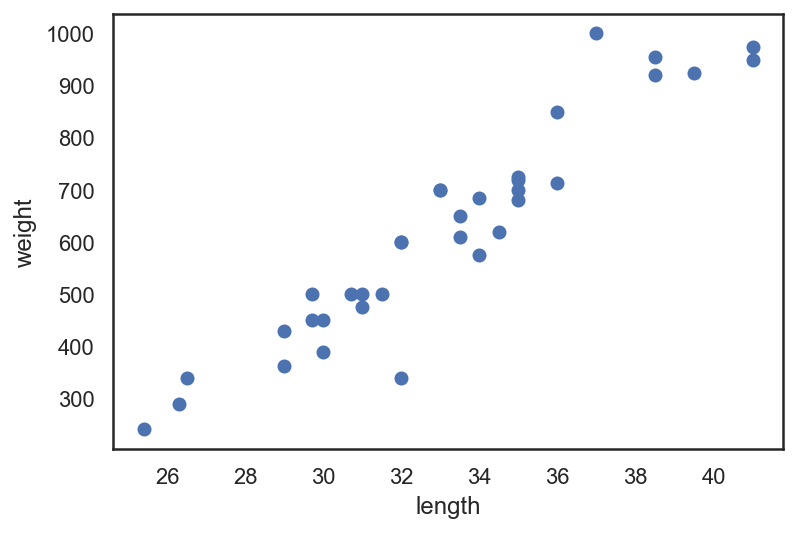

In [3]:
# Feature들을 이해할 수 있게 산점도 그래프로 표현 - matplotlib scatter plot
plt.scatter(bream_length, bream_weight)
plt.xlabel('length')  # x축은 생선 길이
plt.ylabel('weight')  # y축은 생선 무게
plt.show()

- 2개의 특성을 사용하기 때문에 2차원 그래프라고 한다.
- 생선의 길이가 갈수록 무게가 많이 나간다고 생각하면 이 그래프는 매우 자연스러운 그래프 이다.
- 산점도가 일직선에 가까운 형태로 나타내는데, 이런 형태를 **"선형적(linear)"**이라고 말한다.

#### 빙어 데이터 준비 및 데이터 시각화

In [4]:
# 14 마리 빙어 데이터 선언 - 생선 길이, 생선 무게
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

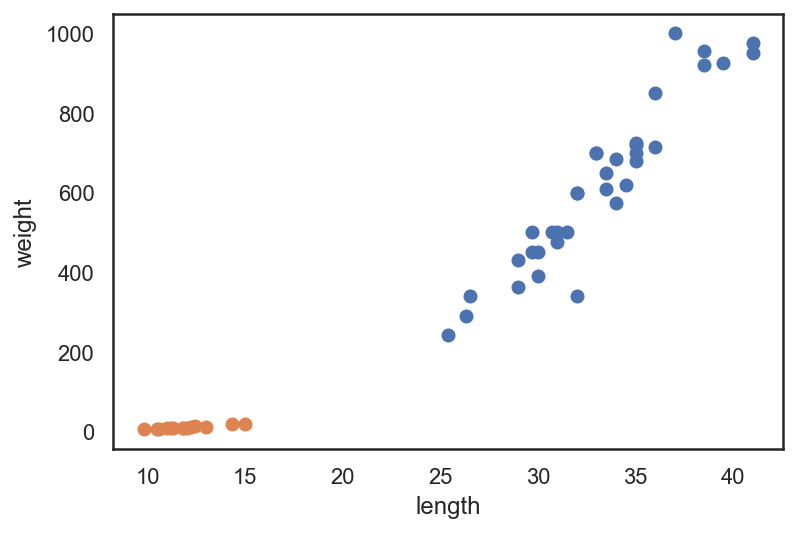

In [5]:
# Feature들을 이해할 수 있게 산점도 그래프로 표현 - matplotlib scatter plot
plt.scatter(bream_length, bream_weight) # 도미 데이터 
plt.scatter(smelt_length, smelt_weight) # 빙어 데이터 
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### 첫 번째 머신러닝 프로그램 - K-최근접 이웃 (K-Nearest Neighbors) 알고리즘 

In [6]:
# 도미 데이터와 빙어데이터 합치기 
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

- 이렇게 두 데이터를 합치면 가로 형식의 리스트로 합쳐져있다. 이를 세로방향으로 늘어뜨린 2차원 리스트로 변형해줘야 한다. 
- 이때 zip() 함수와 리스트 내포 구문을 사용하여 2차원 리스트로 변형

In [7]:
# 2차원 리스트로 변형하기 
fish_data = [[l, w] for l, w in zip(length, weight)]

In [8]:
# 데이터 확인 
print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


- 마지막으로 준비해야 할 것이 바로 정답 데이터 이다. 
- 첫 번째 생선은 도미이고, 두 번째 생선도 도미라는 식으로 각각 어떤 생선인지 답을 만드는 작업
- 이러한 작업을 하는 이유는 컴퓨터는 문자를 직접 이해하지 못하고 숫자 1 혹은 0으로 인지함, 최소한 어떤 생선이 도미인지 빙어인지를 알려줘야 우리가 원하는 해답을 얻을 수 있음.

In [9]:
# 앞에서 도미와 빙어를 순서대로 나열, 정답 리스트는 1(도미) 35번, 0(빙어) 14번 등장 
## 곱셈 연산자를 사용하여 파이썬 리스트를 간단하게 반복시킴
fish_target = [1] * 35 + [0] * 14 
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


- 그 후 K-최근접 알고리즘을 구현할 클래스인 KNeighborsClassifier를 임포트

In [10]:
# K-최근접 알고리즘 패키지 임포트 
from sklearn.neighbors import KNeighborsClassifier

In [11]:
# KNeighborsClassifier 클래스의 객체 만들기 
kn = KNeighborsClassifier()

- fish data와 fish target을 전달하여 도미를 찾기 위한 기준 학습을 시킴, 이런 과정을 머신러닝에서 훈련(Training)이라고 함.
- 사이킷런 패키지에서는 fit() 메서드가 이런 역할을 함.

In [12]:
# data Training
kn.fit(fish_data, fish_target)

KNeighborsClassifier()

In [13]:
# score() 메서드를 이용하여 모델 평가하기 
kn.score(fish_data, fish_target)

1.0

- 모델을 평가한 결과 1.0이라는 수치가 나옴 
- 이 모델의 정확도가 1.0 즉 100%를 의미하여, 해당 모델은 정확함이 확인됨.(도미와 빙어를 완벽하게 분류함)

### K-최근접 이웃 알고리즘
- 위에서 사용한 알고리즘이 바로 K-최근접 이웃 알고리즘 이다.
- 이 알고리즘은 어떤 데이터에 대한 답을 구할 때 주위의 다른 데이터를 보고 다수를 차지하는 것을 정답으로 사용한다.(마치 근묵자흑['사람도 주위환경에 따라 변할 수 있다' 라는 뜻의 사자성어] 처럼 주위의 데이터로 현재 데이터를 판단함.)
- K-최근접 이웃 알고리즘을 위해 준비해야할 일은 데이터를 모두 가지고 있는 것이 전부이다. 새로운 데이터에 대해 예측할 때는 가장 가까운 직선거리에 어떤 데이터가 있는지를 살피기만 하면 된다. 
- 하지만 단점은 K-최근접 이웃 알고리즘의 이런 특징 때문에 데이터가 아주 많은 경우 사용하기 힘들다.왜냐하면 데이터의 크기 때문에 메모리가 많이 필요하고, 직선거리를 계산하는 데도 많은 시간이 필요로 하기 때문이다.

In [14]:
# 예측값 - predict() 메서드
kn.predict([[30, 600]])

array([1])

- 새로운 값 결과 1 즉 도미라고 예측함.

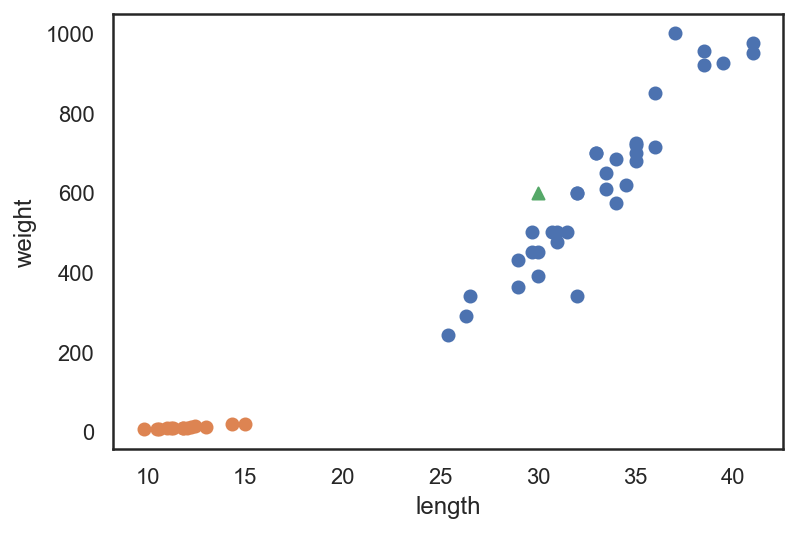

In [23]:
plt.scatter(bream_length, bream_weight) # 도미 데이터 
plt.scatter(smelt_length, smelt_weight) # 빙어 데이터 
plt.scatter(30, 600, marker='^') # 예측값 데이터 
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

- 도미라고 예측한 이유는 데이터가 도미의 데이터에 가깝기 때문이다.

In [15]:
# x 속성에 fish_data 가져오기  
print(kn._fit_X)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [16]:
# y 속성에 fish_target을 가져오기
print(kn._y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


- 실제로 K-최근접 이웃 알고리즘은 무언가 훈련되는 게 없는 셈이다. fit() 메서드에 전달한 데이터를 모두 저장하고 있다가 새로운 데이터가 등장하면 가장 가까운 데이터를 참고하였다가 도미인지 빙어인지를 구분함.
- 몇 개의 데이터를 참고할 지는 정하기 나름이다. KNeighborsClassifier 클래스의 기본값은 5 이다. (기준은 바꿀 수 있음)

In [17]:
# 참고 데이터를 49개로 한 kn49 모델 선언
kn49 = KNeighborsClassifier(n_neighbors=49)

- 가장 가까운 데이터 49개를 사용하는 k-최근접 이웃 모델에 fish_data를 적요하면 fish_data에 있는 모든 생선을 사용하여 예측하게 됨, 다시말해 fish_data의 데이터 49개 중에 도미가 35개로 다수를 차지하므로 어떤 데이터를 넣어도 무조건 도미로 예측할 것이다.

In [18]:
kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)

0.7142857142857143

- 앞서 fish_data에 있는 생선 중 도미가 35개이고 빙어가 14개이다, kn49 모델은 도미만 올바르게 맞히기 때문에 정확도를 계산하면 score() 메스드와 같은 값을 얻을 수 있다.

In [19]:
# 비교를 위해 정확도 계산
print(35/49)

0.7142857142857143


- 비교 결과 n_neighbors 매개변수를 49로 두는 것은 좋지 않음을 알 수 있다. 기본값을 5로 다시하여 도미를 완벽하게 분류한 모델을 사용해야한다는 결론이 나옴

In [20]:
# 다시 데이터를 매개변수를 기본으로 한 kn5 모델 선언
kn5 = KNeighborsClassifier(n_neighbors=5)

In [21]:
# 정확도 평가 - 1.0
kn5.fit(fish_data, fish_target)
kn5.score(fish_data, fish_target)

1.0

### 도미와 빙어 분류 문제해결 과정과 결론 
- 도미와 빙어를 구분하기 위해 첫 번째 머신러닝 프로그램을 만듬
    1. 먼저 도미 35마리와 빙어 14마리의 길이와 무게를 측정해서 파이썬 리스트로 만듬
    2. 그 다음 도미와 빙어 데이터를 합쳐 리스트의 리스트로 데이터를 준비 
    3. 사용할 알고리즘은 K-최근접 이웃(KNeighborsClassifier) 알고리즘
    4. K-최근접 이웃(KNeighborsClassifier) 알고리즘은 주변의 5개의 데이터를 보고 다수결의 원칙에 따라 데이터를 예측함.
- 결과
    - K-최근접 이웃(KNeighborsClassifier) 알고리즘의 매개변수 기본값 5(n_neighbors=5)를 설정하고 모델을 사용한 결과 도미와 빙어 데이터를 모두 완벽하게 맞혔음 (정확도: 1.0(100%))

In [22]:
# 4번 문제 확인 코드 
kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target)

for n in range(5, 50):
    # k-최근접 이웃 개수 설정
    kn.n_neighbors = n
    # 점수 계산
    score = kn.score(fish_data, fish_target)
    # 100% 정확도에 미치지 못하는 이웃 개수 출력
    if score < 1:
        print(n, score)
        break

18 0.9795918367346939
